# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file =  'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file =   'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = ?

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

4


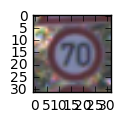

In [16]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, n_train)
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])


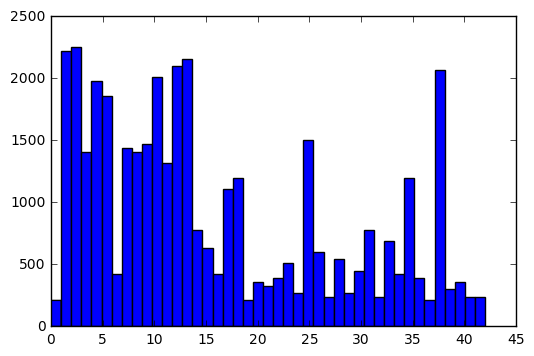

In [4]:
plt.hist(y_train, n_classes)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train = X_train / 255.
X_test = X_test / 255.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.**Answer:**
1) shuffle the data set as LeNet Lab did. As We don't want the oder of the image impact our model.
2) Normalize data to [0, 1]
I also saw somewhere else normailze data to [-1, 1] or [0.1, 0.9], I don't know what's the difference here.

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
#prepare Validation
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Model Architecture### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** We have no validation data here, so I use train_test_split from sklearn.model_selection to get 20% of data from training data as validation data set.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import cv2

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 128

def LeNet(x, dropout):
    mu = 0
    sigma = 0.1

    # Layer 1 output shape 30*30*32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)
    # output 10*10*32
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
#    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2 output shape 9*9*64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)
    # output 3*3*64 ?
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
#    conv2 = tf.nn.dropout(conv2, dropout)
    
    fc0 = flatten(conv2)
    
    # FC Layer 1
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1 = tf.nn.relu(fc1)
#    fc1 = tf.nn.dropout(fc1, dropout)
    
    # FC Layer 1024 -> 1024?
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2 = tf.nn.relu(fc2)
#    fc2 = tf.nn.dropout(fc2, dropout)
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def NewNet(x, dropout):
    mu = 0
    sigma = 0.1

    # Layer 1 1*1 convolutions?
    # I'm not sure I understand the model correct. Is it a CNN with patch 1*1*3?
    # So the output here is same with original one 32 * 32 * 3
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(3))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='SAME') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    
    # I guess no max pool and dropout here
    
    # Layer 2 I'm not sure what the strides here should be
    # If I used 1 here, then output shape should be 32*32*32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='SAME') + conv2_b

    conv2 = tf.nn.relu(conv2)
    # output 11*11*32
    conv2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')
    conv2 = tf.nn.dropout(conv2, dropout)

    # Layer 3 output shape 11*11*64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='SAME') + conv3_b
    
    conv3 = tf.nn.relu(conv3)
    # output 4*4*64 ?
    conv3 = tf.nn.max_pool(conv3, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')
    conv3 = tf.nn.dropout(conv3, dropout)

    # Layer 4 output shape 4*4*128
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean=mu, stddev=sigma))
    conv4_b = tf.Variable(tf.zeros(128))
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1,1,1,1], padding='SAME') + conv4_b
    
    conv4 = tf.nn.relu(conv4)
    # output 2*2*128
    conv4 = tf.nn.max_pool(conv4, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')
    conv4 = tf.nn.dropout(conv4, dropout)
    
    # Inception Module?
    # the model shows all the output of layer 2,3,4 should be input of flatten here, I don't know how to do this
    fc0 = tf.concat(1, [flatten(conv4), flatten(conv3), flatten(conv2)])
    
    # FC Layer 1
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2*2*128+4*4*64+11*11*32, 1024), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # FC Layer 1024 -> 1024?
    fc2_W = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(1024))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(1024, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.**Answer:**
I re-do it like the reviewer suggested below

![New Architecture](model.PNG)

### Input
This architecture accepts a 32x32x3 image as input.

### Architecture
**Layer 1: Convolutional.**
I guess it is a 1*1 convolutions, a CNN with patch 1*1*3. So the output here is same with original one 32 * 32 * 3

**Activation.** relu

**Layer 2: Convolutional.**
I guess the size of patch here is 3*3*1 and the stride is 1, and output is 32*32*32

**Activation.** relu

**Pooling.** The output shape should be 11x11x32. I choose 'SAME' padding, as if I choose 'VALID' I can have 3 CNN layers.

**dropuout.** I found it's to low if I use 0.5, so I use 0.75 instead.

**Layer 3: Convolutional.** The output shape is 11x11x64.

**Activation.** relu

**Pooling.** The output shape is 4x4x64.

**dropuout.** I found it's to low if I use 0.5, so I use 0.75 instead.

**Layer 4: Convolutional.** The output shape is 4x4x128.

**Activation.** relu

**Pooling.** The output shape is 2x2x128.

**dropuout.** I found it's to low if I use 0.5, so I use 0.75 instead.

**Flatten.** Flatten the output shape of the layer2, layer3 and layer4. so it's 1D instead of 3D, and shape is (2*2*128+4*4*64+11*11*32)

**Layer 5: Fully Connected.** This layer has 1024 outputs.

**Activation.** relu

**dropuout.** I found it's to low if I use 0.5, so I use 0.75 instead.

**Layer 6: Fully Connected.** This layer has 1024 outputs.

**Activation.** relu

**dropuout.** I found it's to low if I use 0.5, so I use 0.75 instead.

**Layer 7: Fully Connected (Logits).** This layer has 43 outputs.

### Output
Return the result of final layer.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

# Training Pipeline
rate = 0.001
dropout = 0.5

logits = NewNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.533

EPOCH 2 ...
Validation Accuracy = 0.800

EPOCH 3 ...
Validation Accuracy = 0.901

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.954

EPOCH 6 ...
Validation Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.968

EPOCH 8 ...
Validation Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.986

EPOCH 15 ...
Validation Accuracy = 0.986

EPOCH 16 ...
Validation Accuracy = 0.988

EPOCH 17 ...
Validation Accuracy = 0.987

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.991

EPOCH 20 ...
Validation Accuracy = 0.990

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.991

EPOCH 23 ...
Validation Accuracy = 0.990

EPOCH 24 ...
Validation Accura

In [9]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.895


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Like LeNet lab, I still use 128 for batch size, according to [here](http://stats.stackexchange.com/questions/140811/how-large-should-the-batch-size-be-for-stochastic-gradient-descent), I think it is a good number, I choose to train the model for 30 epochs, as I found after I added "dropout" I need more epochs to reach a higher accuracy.
The hyperparameters I choose is 0 for mean and 0.1 for stardard deviation.
I use the [Adam optimizer](http://sebastianruder.com/optimizing-gradient-descent/index.html#adam) and learning rate is 0.001


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
At first, I just do it like LeNet lab, the training process finally get a 95.7% accuracy and the test accuracy is 0.888
The reviewer provided me a new architecture which added more CNN layers and applyed dropout to prevent overfitting.  I use that for this time and found if I choose 0.5 for dropout probility, and accuracy is very low, I choose 0.75 in my final submittion and the accurcy reatched 99.3%, thet etst accuracy is 89.5%, it improves a lot.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

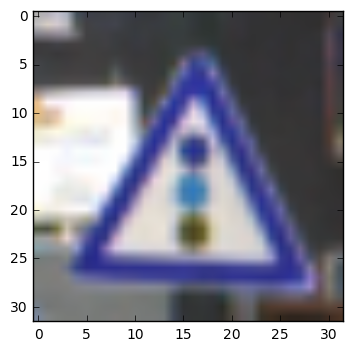

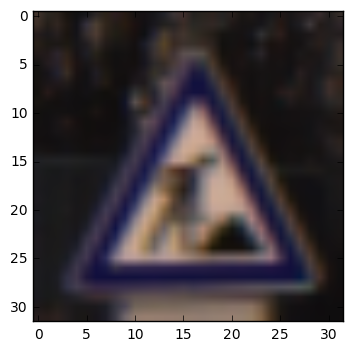

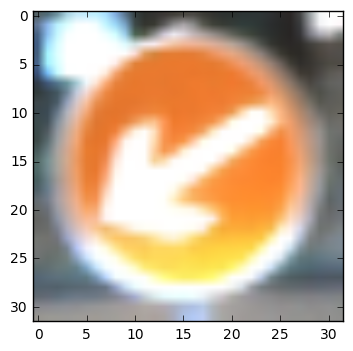

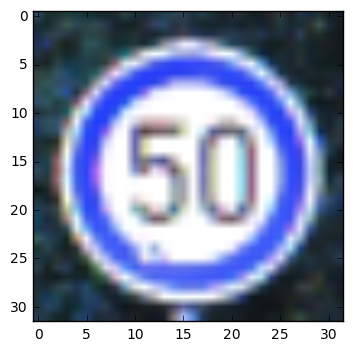

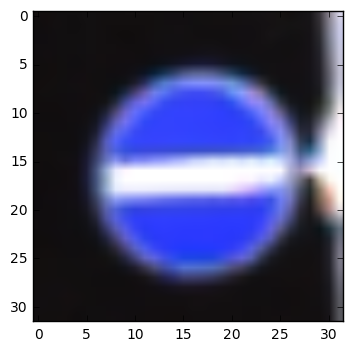

(5, 32, 32, 3)


In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np

traffic_signs_path = "traffic_signs/"
images = os.listdir(traffic_signs_path)
new_test = []
for image in images:
    dim = (32, 32)
    img = cv2.imread(traffic_signs_path + image)
    img = cv2.resize(img, dim)
    plt.imshow(img)
    plt.show()
    new_test.append(img)
    
new_test = np.asarray(new_test)
print(new_test.shape)

### Predict the Sign Type for Each Image### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I would say first, the 43 classes in the signames is not enough and not very clear for me to find a correspond traffic sign image for it, and the quality of the image found online is very bad.

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.### Run the predictions here.
### Feel free to use as many code cells as needed.

new_test_lables = np.array([26, 25, 39, 2, 17])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_accuracy = evaluate(new_test, new_test_lables)
    
    print("pridiction accuracy = {:.3f}".format(new_test_accuracy))


pridiction accuracy = 0.400


### Analyze Performance### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Nope, it's only able to get 2 out of 5 images correct, means only 40% accuracy, way below my test accuracy 86.5%. I think the reason should be 1) My training data set is not large enough and didn't have enough number of many traffic signs. 2) The test image I got online have a very bad quality, I think some kind of preprocess may be able to improve it.

Label 26
0: 18 (100%)
1: 0 (0%)
2: 1 (0%)


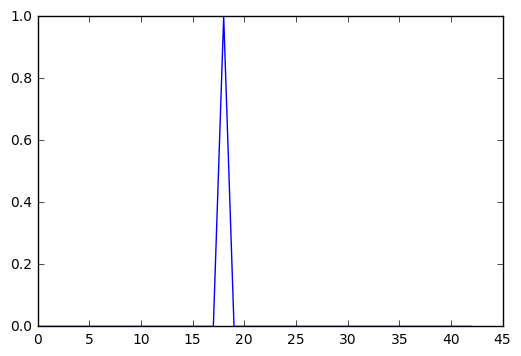

Label 25
0: 25 (100%)
1: 0 (0%)
2: 1 (0%)


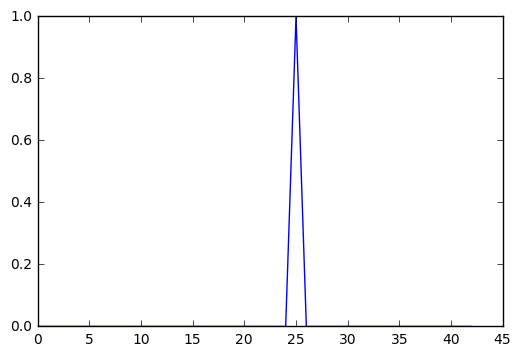

Label 39
0: 17 (100%)
1: 0 (0%)
2: 1 (0%)


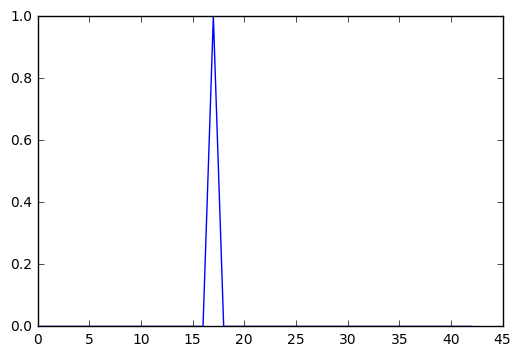

Label 2
0: 2 (100%)
1: 0 (0%)
2: 1 (0%)


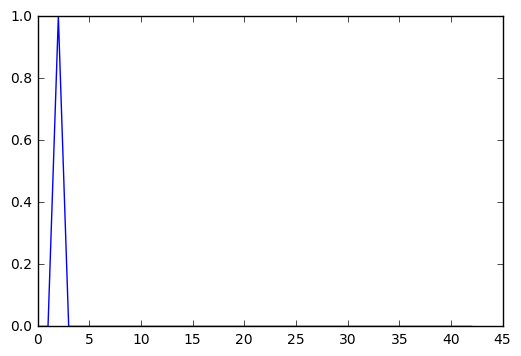

Label 17
0: 38 (100%)
1: 0 (0%)
2: 1 (0%)


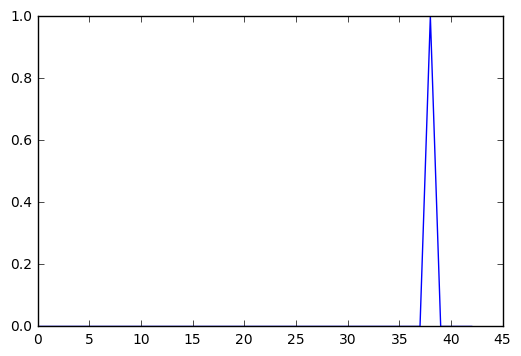

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_softmax_logits = sess.run(softmax_logits, feed_dict={x: new_test, keep_prob: 1})
    new_top_k = sess.run(top_k, feed_dict={x: new_test, keep_prob: 1})

for i in range(len(new_softmax_logits)):
    print("Label", new_test_lables[i])
    for j in range(3):
        print('{}: {} ({:.0f}%)'.format(j, new_top_k[1][i][j], 100*new_top_k[0][i][j]))
    plt.plot(new_softmax_logits[i])
    plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the WebFor each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.**Answer:** No, for some reason, the 2nd and 3rd guesses are still incorrect, actually, many of 2nd and 3rd guesses are 0% cerntainty.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")